
# Credit Card Fraud — EDA, Anomaly Detection, Evaluation, and 2D Embeddings

**Датасет:** `creditcard.csv` (https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv).  

> ```bash
> pip install umap-learn scikit-learn matplotlib pandas numpy
> ```


In [1]:
!pip install umap-learn scikit-learn matplotlib pandas numpy

In [2]:
import os, math, warnings, numpy as np, pandas as pd
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                             roc_curve, precision_recall_curve, average_precision_score)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope

from sklearn.manifold import TSNE

try:
    import umap
    UMAP_AVAILABLE = True
except Exception:
    UMAP_AVAILABLE = False

RANDOM_STATE = 42

from google.colab import drive
drive.mount('/content/drive/')

df = pd.read_csv("creditcard.csv")

print('Shape:', df.shape)
df.head()


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Едим EDA


=== Информация о данных ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995



=== Class distribution ===
Class
0    284315
1       492
Name: count, dtype: int64
Fraud rate (contamination) = 0.001727  (0.1727%)


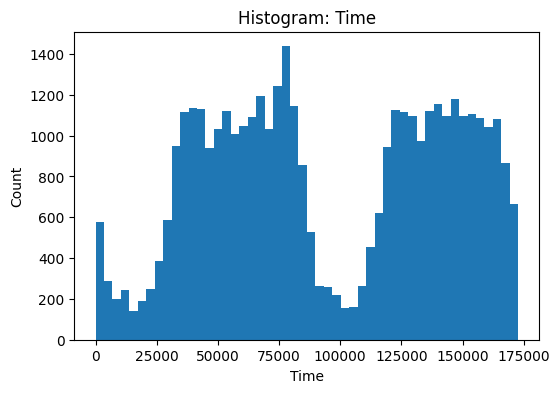

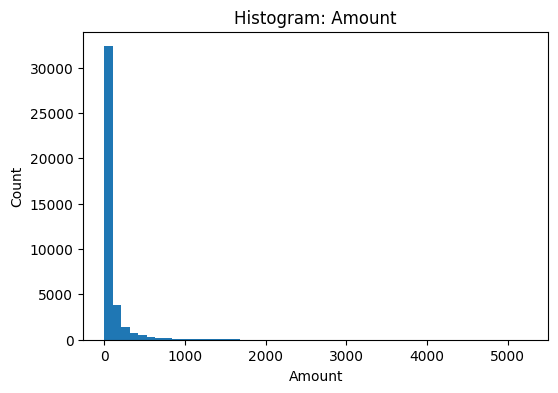

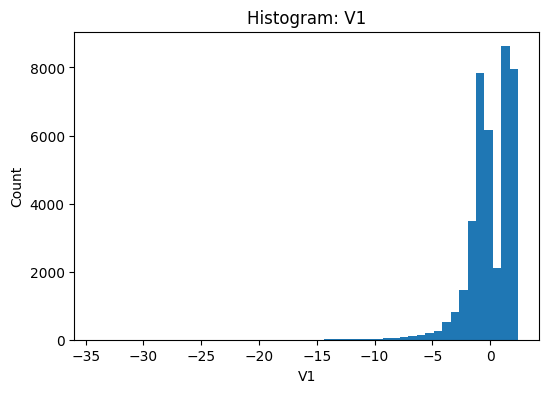

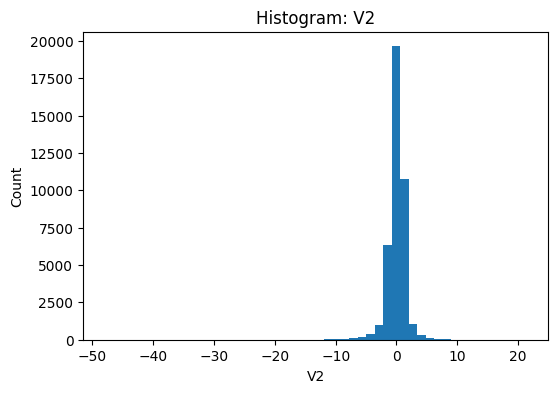

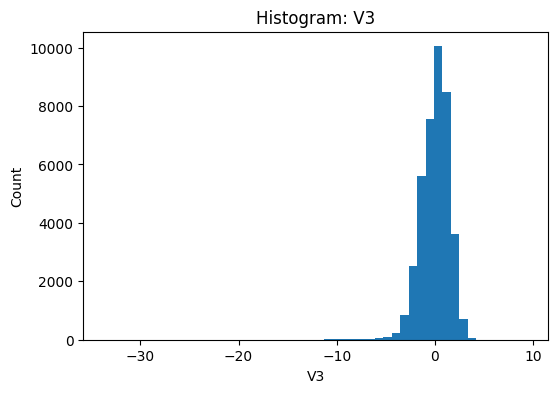

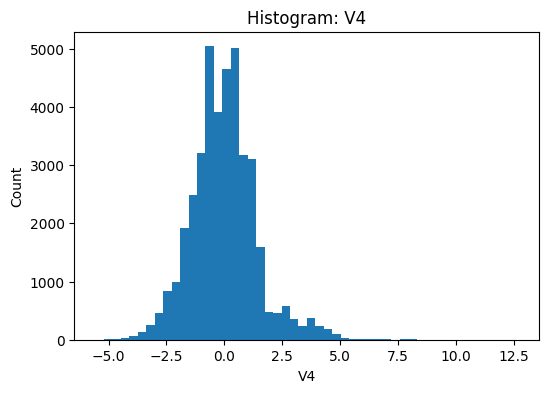

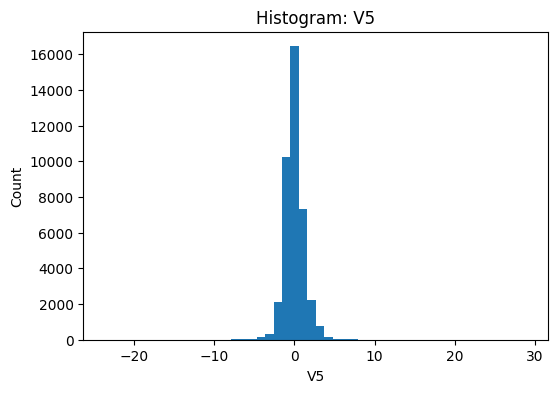

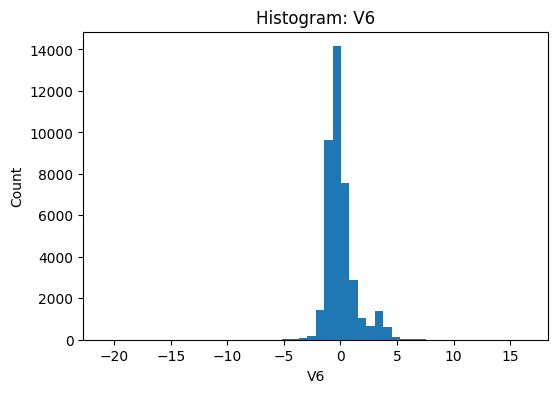

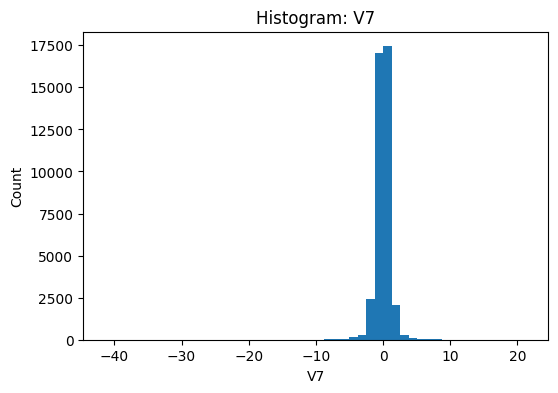

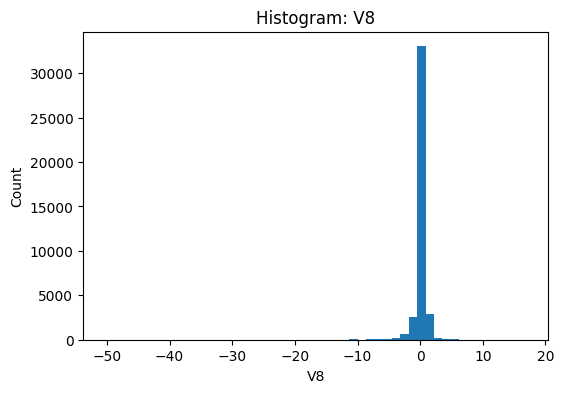

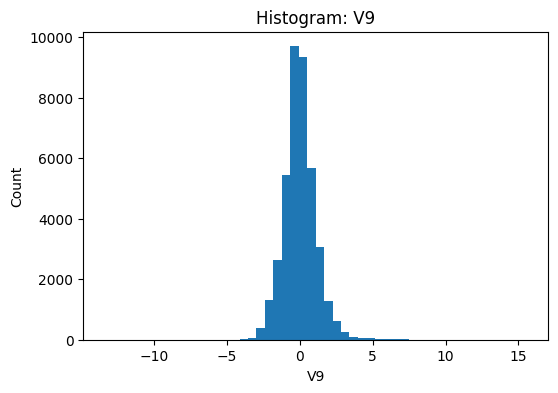

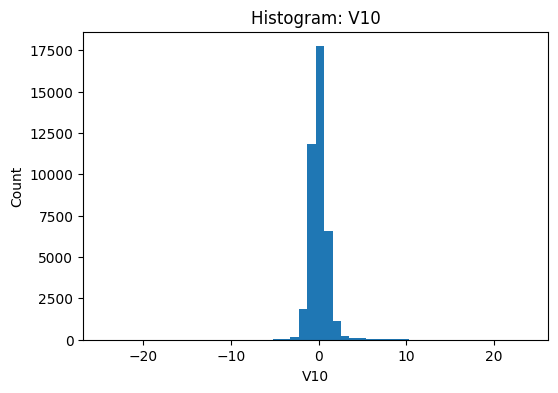

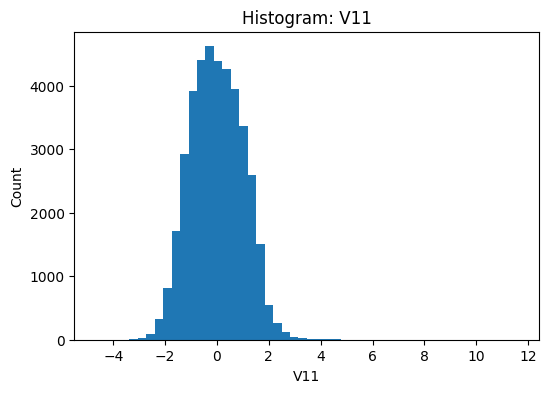

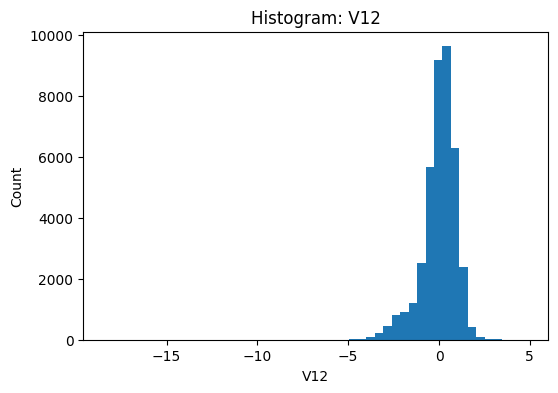

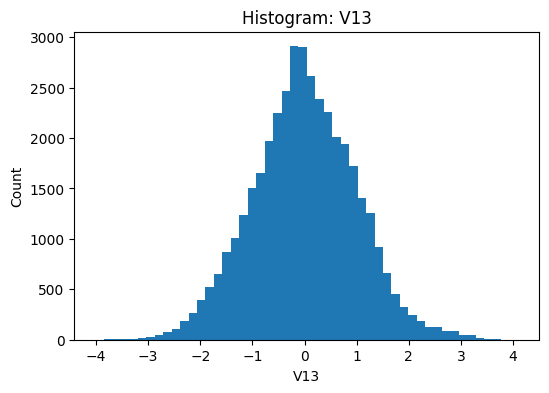

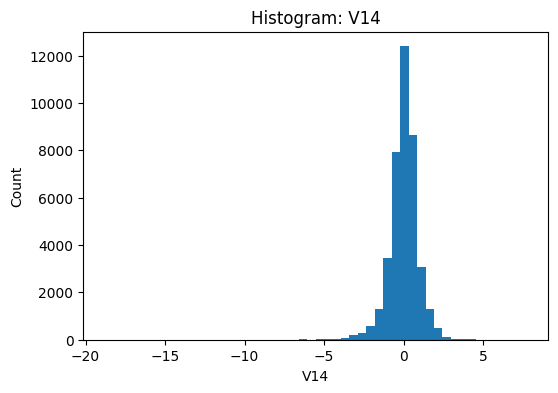

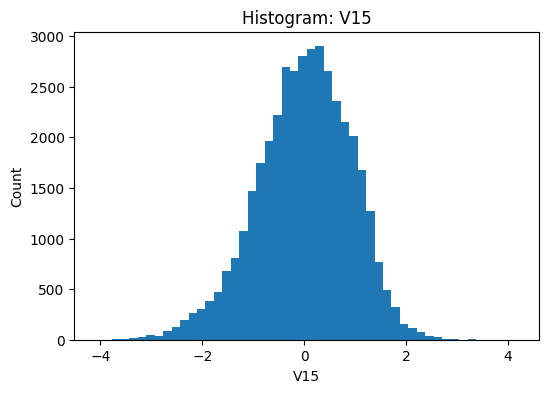

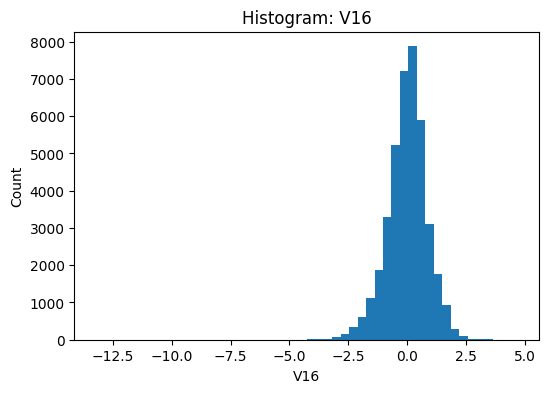

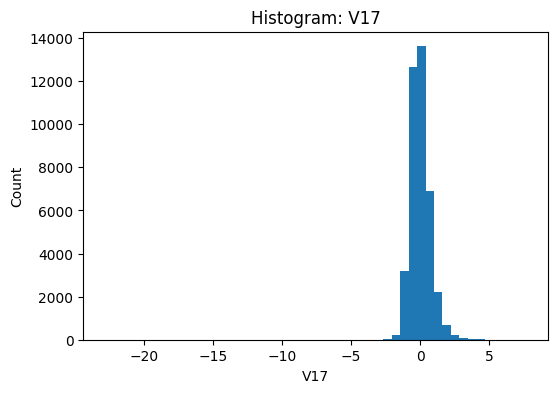

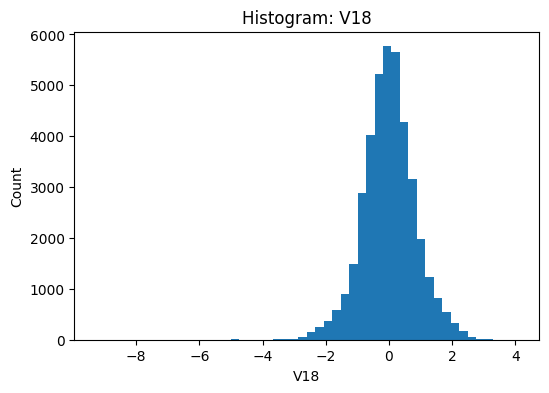

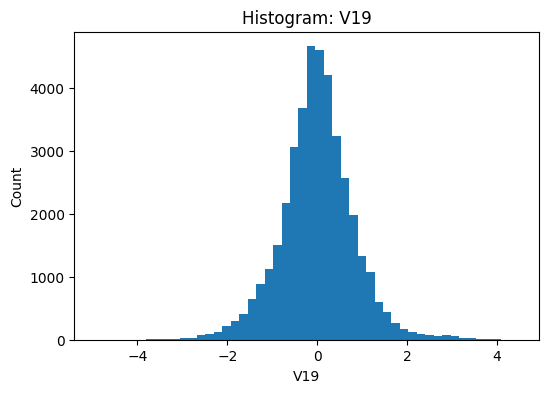

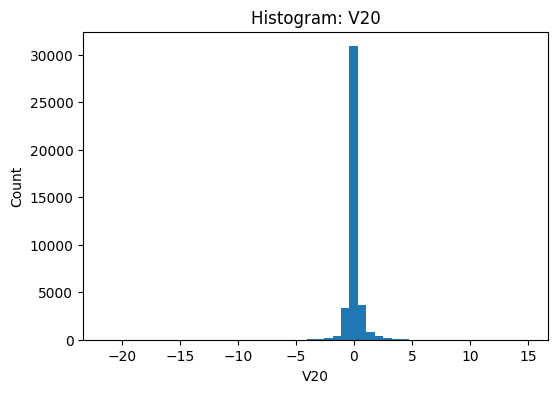

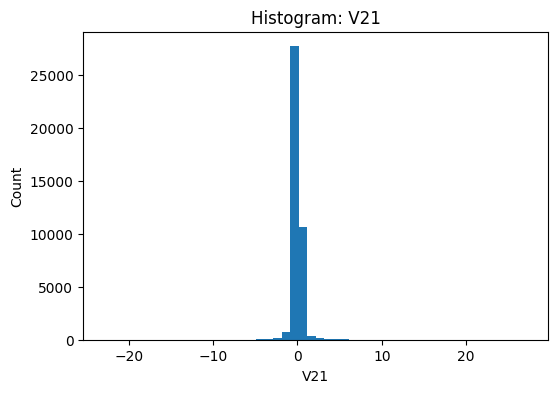

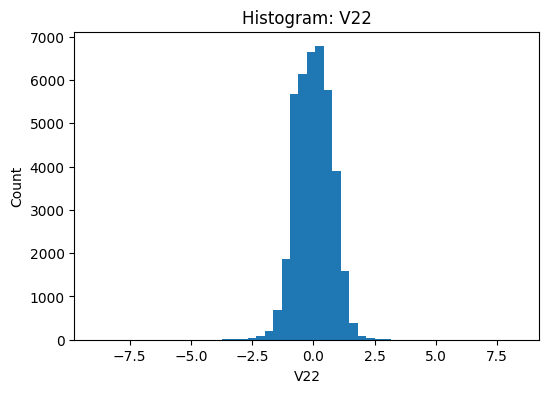

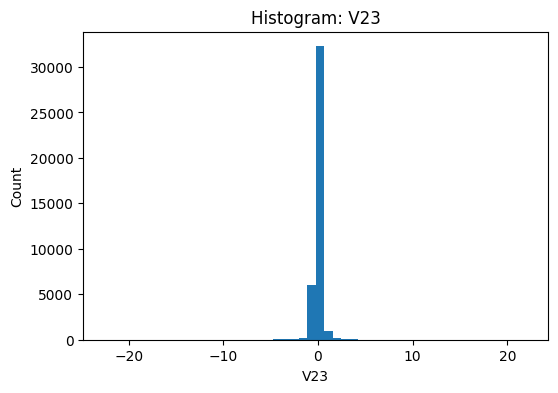

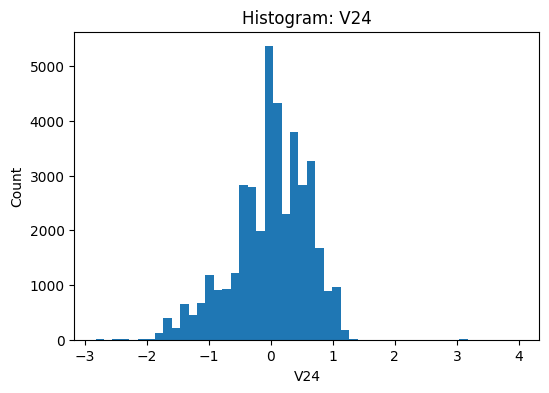

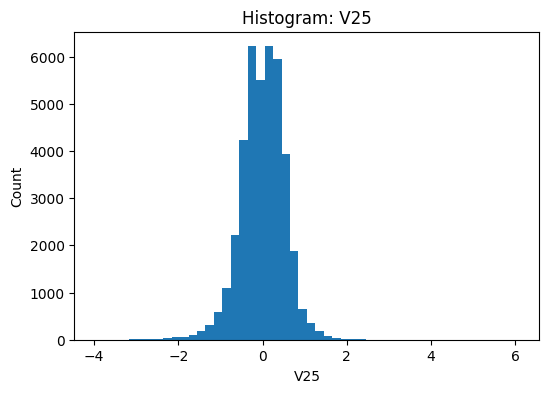

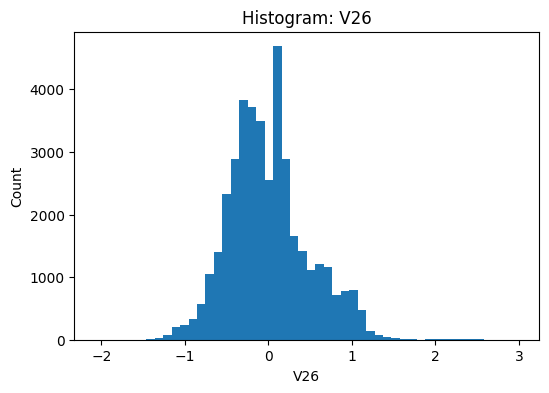

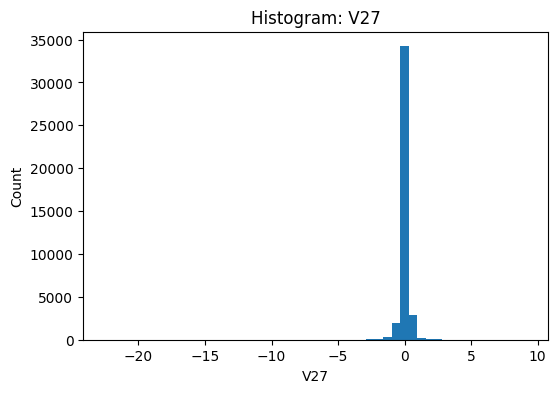

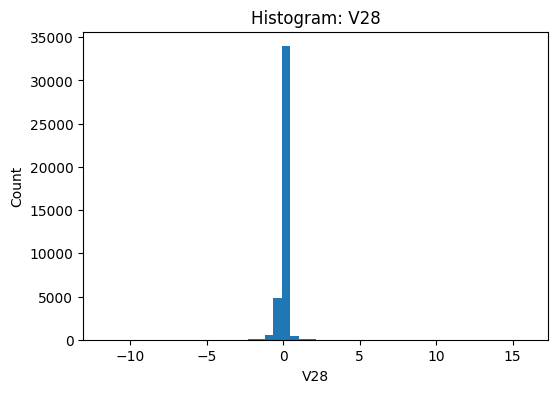

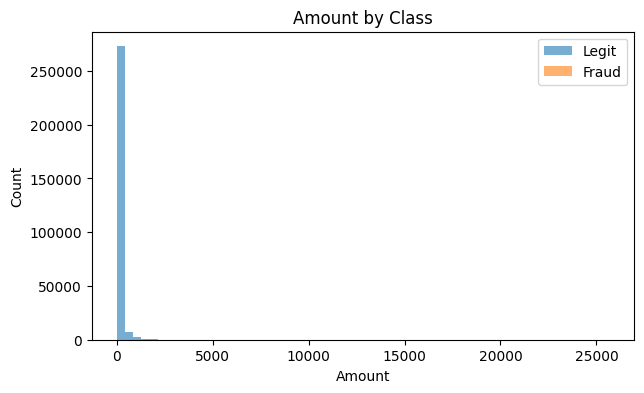

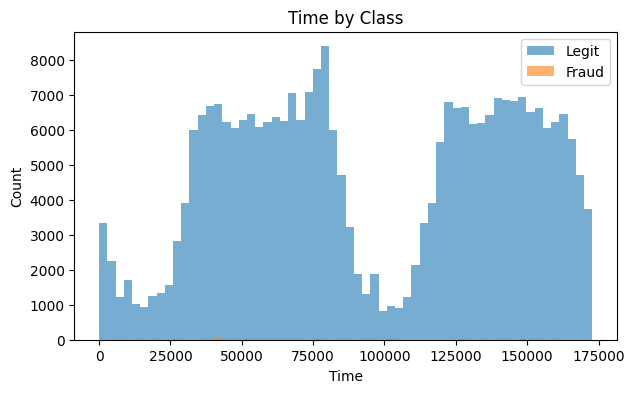

In [3]:

print("\n=== Информация о данных ===")
print(df.info())

print("\n=== Описательная статистика ===")
display(df.describe().T)

# Распределение классов и загрязнённость
class_counts = df['Class'].value_counts().sort_index()
fraud_rate = df['Class'].mean()
print("\n=== Class distribution ===")
print(class_counts)
print(f"Fraud rate (contamination) = {fraud_rate:.6f}  ({fraud_rate*100:.4f}%)")

# Гистограммы основных признаков
cols_to_plot = ['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)]
sample_for_plots = df.sample(n=min(40000, len(df)), random_state=RANDOM_STATE)

def plot_histograms(data, cols, bins=50):
    for c in cols:
        plt.figure(figsize=(6,4))
        plt.hist(data[c].dropna(), bins=bins)
        plt.title(f"Histogram: {c}")
        plt.xlabel(c); plt.ylabel("Count")
        plt.show()

plot_histograms(sample_for_plots, ['Time','Amount'])
plot_histograms(sample_for_plots, [f'V{i}' for i in range(1, 15)])
plot_histograms(sample_for_plots, [f'V{i}' for i in range(15, 29)])

# Наложение по классам для Amount/Time
def plot_hist_by_class(column):
    plt.figure(figsize=(7,4))
    df[df['Class']==0][column].plot(kind='hist', bins=60, alpha=0.6, label='Legit')
    df[df['Class']==1][column].plot(kind='hist', bins=60, alpha=0.6, label='Fraud')
    plt.title(f"{column} by Class")
    plt.xlabel(column); plt.ylabel("Count"); plt.legend()
    plt.show()

plot_hist_by_class('Amount')
plot_hist_by_class('Time')


Что видно сверху?
Пропусков нет, масштабы в порядке. Почти все фичи имеют пик, некоторые даже похожи на Гаусса. Визуально есть пара признаков (V27, V24) где аномалии яркие, в некоторых других (V19,V18,V16) сработают какие-нибудь 3 сигмы неплохо.

In [4]:

# немного препроцесса
X = df.drop(columns=['Class'])
y = df['Class'].astype(int)

# Масштабируем Time/Amount (остальные признаки V1..V28 — PCA-компоненты)
scale_cols = ['Time', 'Amount']
ct = ColumnTransformer(
    transformers=[('scale', StandardScaler(), scale_cols)],
    remainder='passthrough'
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y
)

# Также подготовим "полностью робастную" версию признаков для некоторых методов
robust_ct = ColumnTransformer(
    transformers=[('scale_all', RobustScaler(), X.columns.tolist())],
    remainder='drop'
)
X_train_rob = robust_ct.fit_transform(X_train)
X_test_rob = robust_ct.transform(X_test)

print(X_train.shape, X_test.shape)


(213605, 30) (71202, 30)



## Пороговые методы: 3-sigma и IQR

Идея: считать точку аномальной, если **хотя бы по одному признаку** она выходит за порог.  
Сделаем два варианта:  
- **3-sigma** (|z| > 3) по каждому признаку.  
- **IQR rule** (ниже Q1-1.5*IQR или выше Q3+1.5*IQR) по каждому признаку.

Для повышения устойчивости применим робастное масштабирование для оценки z-score.


In [5]:

# 3-sigma по всем признакам
# Посчитаем z-score на базе RobustScaler (приближение к робастному z-score)
X_all = robust_ct.fit_transform(X)  # обучаем на всех для стабильности порогов
feature_names = X.columns.tolist()

X_all_df = pd.DataFrame(X_all, columns=feature_names, index=X.index)

z = (X_all_df - X_all_df.mean(axis=0)) / (X_all_df.std(axis=0) + 1e-9)
sigma3_flags = (np.abs(z) > 3).any(axis=1).astype(int)  # 1 = аномалия, если где-то |z|>3

# IQR rule по всем признакам
Q1 = X_all_df.quantile(0.25)
Q3 = X_all_df.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

iqr_flags = ((X_all_df < lower) | (X_all_df > upper)).any(axis=1).astype(int)

print("3-sigma flagged:", sigma3_flags.sum(), " fraction of all db: ", sigma3_flags.sum() / X.shape[0])
print("IQR flagged:", iqr_flags.sum(), " fraction of all db: ", iqr_flags.sum() / X.shape[0])

# Оценим качество пороговых методов (поскольку есть метки Class)
def evaluate_binary_flags(name, flags, y_true):
    y_pred = flags.values if isinstance(flags, pd.Series) else flags
    print(f"\n=== {name} ===")
    print(classification_report(y_true, y_pred, digits=4))
    print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))

evaluate_binary_flags("3-sigma (any feature)", sigma3_flags, y)
evaluate_binary_flags("IQR (any feature)", iqr_flags, y)


3-sigma flagged: 37816  fraction of all db:  0.13277763538115286
IQR flagged: 138473  fraction of all db:  0.4861994262781463

=== 3-sigma (any feature) ===
              precision    recall  f1-score   support

           0     0.9998    0.8686    0.9296    284315
           1     0.0117    0.9024    0.0232       492

    accuracy                         0.8686    284807
   macro avg     0.5058    0.8855    0.4764    284807
weighted avg     0.9981    0.8686    0.9280    284807

Confusion matrix:
 [[246943  37372]
 [    48    444]]

=== IQR (any feature) ===
              precision    recall  f1-score   support

           0     0.9999    0.5146    0.6795    284315
           1     0.0034    0.9695    0.0069       492

    accuracy                         0.5154    284807
   macro avg     0.5017    0.7421    0.3432    284807
weighted avg     0.9982    0.5154    0.6784    284807

Confusion matrix:
 [[146319 137996]
 [    15    477]]


Что видно - по IQR слишком много выделилось аномалий половина от данных. По 3 sigma получше ситуация, но тоже не супер. Значит обычной статистикой тут аномалии отсекать - плохая идея


## 5. DBSCAN (кластеризация с шумом)

DBSCAN помечает точки, не попавшие в кластеры, как **шум** — будем трактовать их как аномалии.  
Подберём `eps` по небольшой сетке, ориентируясь на целевую долю шума, близкую к `contamination`.


In [6]:
# DBSCAN люто жрет ОЗУ -- поиск по сетке на СЭМПЛЕ + перенос меток на весь набор

import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# 1) Робастное масштабирование + float32 (экономим память)
X_all_rob = robust_ct.fit_transform(X).astype(np.float32)
target_cont = max(y.mean(), 1e-6)

# 2) PCA до малой размерности (ускоряет и kNN, и DBSCAN)
pca = PCA(n_components=12, random_state=42, whiten=True)
X_pca = pca.fit_transform(X_all_rob).astype(np.float32)

# 3) Сэмпл для подбора eps и запуска DBSCAN
subsample = 20000
rng = np.random.RandomState(42)
idx_sub = rng.choice(len(X_pca), size=min(subsample, len(X_pca)), replace=False)
X_sub = X_pca[idx_sub]

min_samples = 5

# 4) Помогаем сетке — оценим базовый eps по k-distance и построим сетку вокруг него
nn_sub = NearestNeighbors(
    n_neighbors=min_samples,
    algorithm="kd_tree",
    leaf_size=40,
    n_jobs=-1
).fit(X_sub)
k_dists_sub, _ = nn_sub.kneighbors(X_sub)
eps0 = float(np.quantile(k_dists_sub[:, -1], 1 - target_cont))

# Сетка вокруг eps0 (±25%, 6 точек).
rel_span = 0.25
n_steps = 6
eps_grid = np.linspace(eps0 * (1 - rel_span), eps0 * (1 + rel_span), n_steps)

def dbscan_search_on_sample(X_sample, min_samples=5, eps_grid=None, target_cont=target_cont):
    best = None
    for eps in eps_grid:
        db = DBSCAN(
            eps=float(eps),
            min_samples=min_samples,
            algorithm="kd_tree",
            leaf_size=40,
            n_jobs=-1
        ).fit(X_sample)
        labels = db.labels_
        noise_frac = (labels == -1).mean()
        score = -abs(noise_frac - target_cont)  # ближе к целевой доле шума — лучше
        if (best is None) or (score > best['score']):
            best = dict(
                eps=float(eps),
                min_samples=min_samples,
                labels=labels,
                noise_frac=float(noise_frac),
                score=float(score)
            )
        print(f"done eps={float(eps):.6f} | noise_frac={float(noise_frac):.6f}")
    return best

# 5) Поиск лучшего eps на СЭМПЛЕ
best_db = dbscan_search_on_sample(X_sub, min_samples=min_samples, eps_grid=eps_grid, target_cont=target_cont)

# 6) Перенос «шума» с сэмпла на весь набор через 1-NN (очень дёшево по памяти)
#    Если ближайший сосед в сэмпле — шум (-1), считаем и исходную точку шумом.
nn_all = NearestNeighbors(
    n_neighbors=1,
    algorithm="kd_tree",
    leaf_size=40,
    n_jobs=-1
).fit(X_sub)
_, ind = nn_all.kneighbors(X_pca, n_neighbors=1)
nearest_sub_label = best_db['labels'][ind[:, 0]]
dbscan_flags = (nearest_sub_label == -1).astype(int)  # 1 = аномалия (шум в DBSCAN)

print(f"Best DBSCAN (sample) eps={best_db['eps']:.6f} | noise_frac_sample={best_db['noise_frac']:.6f} | target={target_cont:.6f}")
evaluate_binary_flags("DBSCAN(sample→full, noise as anomaly)", dbscan_flags, y)


done eps=9.272470 | noise_frac=0.001900
done eps=10.508800 | noise_frac=0.001600
done eps=11.745129 | noise_frac=0.001250
done eps=12.981458 | noise_frac=0.000950
done eps=14.217788 | noise_frac=0.000900
done eps=15.454117 | noise_frac=0.000750
Best DBSCAN (sample) eps=10.508800 | noise_frac_sample=0.001600 | target=0.001727

=== DBSCAN(sample→full, noise as anomaly) ===
              precision    recall  f1-score   support

           0     0.9984    0.9991    0.9987    284315
           1     0.1401    0.0894    0.1092       492

    accuracy                         0.9975    284807
   macro avg     0.5693    0.5442    0.5540    284807
weighted avg     0.9969    0.9975    0.9972    284807

Confusion matrix:
 [[284045    270]
 [   448     44]]


DBSCAN неплохо справляется на eps = 10.5, выделяет аномалии на уровне того что показывает целевой столбец


## Unsupervised/One-Class методы с использованием `contamination`

- **IsolationForest** (`contamination = fraud_rate`)
- **One-Class SVM** (`nu ≈ fraud_rate`), обучаемся на норме (класс 0).
- **LocalOutlierFactor (novelty=True)**, обучаемся на норме.
- **EllipticEnvelope** (робастная ковариация), зададим `contamination`.


In [7]:

cont = max(y.mean(), 1e-6)
X_train_prep = ct.fit_transform(X_train)
X_test_prep  = ct.transform(X_test)

# a) Isolation Forest
iso = IsolationForest(
    contamination=cont, n_estimators=400, random_state=RANDOM_STATE, n_jobs=-1
).fit(X_train_prep)
iso_pred_test = iso.predict(X_test_prep)  # {1 inlier, -1 outlier}
iso_flags_test = (iso_pred_test == -1).astype(int)

print("\n=== Isolation Forest (TEST) ===")
print(classification_report(y_test, iso_flags_test, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, iso_flags_test))

# b) One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=min(max(cont, 1e-6), 0.5))
ocsvm.fit(X_train_prep[y_train.values==0])  # только на норме
ocsvm_pred_test = ocsvm.predict(X_test_prep)  # {1 inlier, -1 outlier}
ocsvm_flags_test = (ocsvm_pred_test == -1).astype(int)

print("\n=== One-Class SVM (TEST) ===")
print(classification_report(y_test, ocsvm_flags_test, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, ocsvm_flags_test))

# c) LOF (novelty)
lof = LocalOutlierFactor(novelty=True, contamination=cont, n_neighbors=35, n_jobs=-1)
lof.fit(X_train_prep[y_train.values==0])
lof_scores = -lof.score_samples(X_test_prep)  # чем больше — тем "аномальней"
# Порог по contamination
th_lof = np.quantile(lof_scores, 1 - cont)
lof_flags_test = (lof_scores >= th_lof).astype(int)

print("\n=== LOF (novelty, TEST) ===")
print(classification_report(y_test, lof_flags_test, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, lof_flags_test))

# d) EllipticEnvelope (robust covariance)
# Обучим на норме в робастном пространстве
X_train_rob_norm = X_train_rob[y_train.values==0]
ee = EllipticEnvelope(contamination=cont, random_state=RANDOM_STATE, support_fraction=None)
ee.fit(X_train_rob_norm)
ee_pred = ee.predict(robust_ct.transform(X_test))  # {1 inlier, -1 outlier}
ee_flags_test = (ee_pred == -1).astype(int)

print("\n=== EllipticEnvelope (TEST) ===")
print(classification_report(y_test, ee_flags_test, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_test, ee_flags_test))



=== Isolation Forest (TEST) ===
              precision    recall  f1-score   support

           0     0.9987    0.9986    0.9987     71079
           1     0.2320    0.2358    0.2339       123

    accuracy                         0.9973     71202
   macro avg     0.6153    0.6172    0.6163     71202
weighted avg     0.9974    0.9973    0.9973     71202

Confusion matrix:
 [[70983    96]
 [   94    29]]

=== One-Class SVM (TEST) ===
              precision    recall  f1-score   support

           0     0.9997    0.9909    0.9953     71079
           1     0.1332    0.8049    0.2286       123

    accuracy                         0.9906     71202
   macro avg     0.5665    0.8979    0.6120     71202
weighted avg     0.9982    0.9906    0.9940     71202

Confusion matrix:
 [[70435   644]
 [   24    99]]

=== LOF (novelty, TEST) ===
              precision    recall  f1-score   support

           0     0.9983    0.9983    0.9983     71079
           1     0.0163    0.0163    0.0163  

In [8]:
print(cont)

0.001727485630620034


Все алгоритмы на тесте показывают неплохой пресижн по сравнению с целевым столбцом. Каких то явных фаворитов я не вижу, чуть чуть лучше SVM


## Supervised бенчмарки (на метках `Class`)

Используем веса классов, пропорциональные дисбалансу (на базе `contamination`).  
Оценим **classification report**, **confusion matrix**, **ROC-AUC**, **PR-AUC**.



=== LogReg: TEST ===
              precision    recall  f1-score   support

           0     0.9998    0.9770    0.9883     71079
           1     0.0625    0.8862    0.1167       123

    accuracy                         0.9768     71202
   macro avg     0.5311    0.9316    0.5525     71202
weighted avg     0.9982    0.9768    0.9868     71202

Confusion matrix:
 [[69443  1636]
 [   14   109]]
ROC-AUC: 0.97269 | PR-AUC: 0.70617


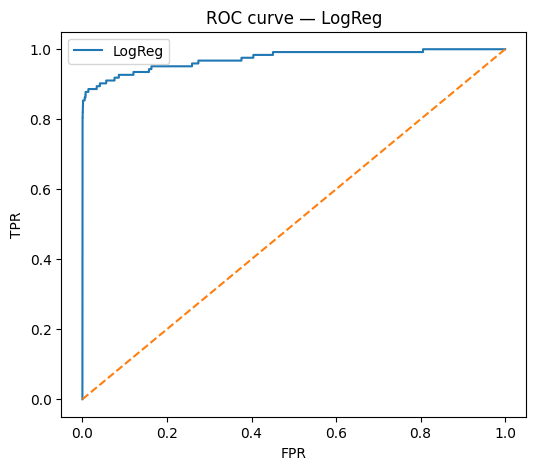

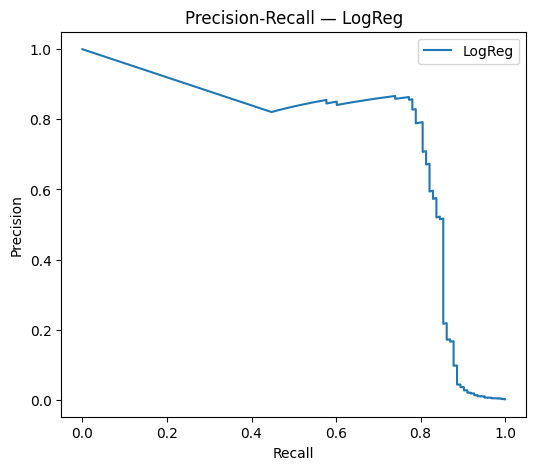

In [ ]:

def evaluate_prob_model(name, model, X_tr, y_tr, X_te, y_te):
    model.fit(X_tr, y_tr)
    if hasattr(model[-1], "predict_proba"):
        p_test = model.predict_proba(X_te)[:,1]
    elif hasattr(model[-1], "decision_function"):
        p_test = model.decision_function(X_te)
    else:
        p_test = model.predict(X_te)

    # Порог 0.5 - взял из головы
    y_pred = (p_test >= 0.5).astype(int)

    print(f"\n=== {name}: TEST ===")
    print(classification_report(y_te, y_pred, digits=4))
    print("Confusion matrix:\n", confusion_matrix(y_te, y_pred))

    roc = roc_auc_score(y_te, p_test)
    pr  = average_precision_score(y_te, p_test)
    print(f"ROC-AUC: {roc:.5f} | PR-AUC: {pr:.5f}")

    fpr, tpr, _ = roc_curve(y_te, p_test)
    prec, rec, _ = precision_recall_curve(y_te, p_test)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"{name}")
    plt.plot([0,1],[0,1],'--')
    plt.title(f"ROC curve — {name}")
    plt.xlabel("FPR"); plt.ylabel("TPR"); plt.legend(); plt.show()

    plt.figure(figsize=(6,5))
    plt.plot(rec, prec, label=f"{name}")
    plt.title(f"Precision-Recall — {name}")
    plt.xlabel("Recall"); plt.ylabel("Precision"); plt.legend(); plt.show()

pos_weight = (1 - fraud_rate) / max(fraud_rate, 1e-9)
class_weight = {0:1.0, 1:pos_weight}

models = {
    "LogReg": Pipeline([('prep', ct),
                        ('clf', LogisticRegression(max_iter=600, class_weight=class_weight, solver='lbfgs'))]),
    "RandomForest": Pipeline([('prep', ct),
                              ('clf', RandomForestClassifier(
                                  n_estimators=300, class_weight=class_weight, n_jobs=-1, random_state=RANDOM_STATE))])
}

for nm, mdl in models.items():
    evaluate_prob_model(nm, mdl, X_train, y_train, X_test, y_test)



## 2D-визуализации (t-SNE и UMAP)

Возьмём сэмпл для скорости. Покажем распределение классов на карте признаков.


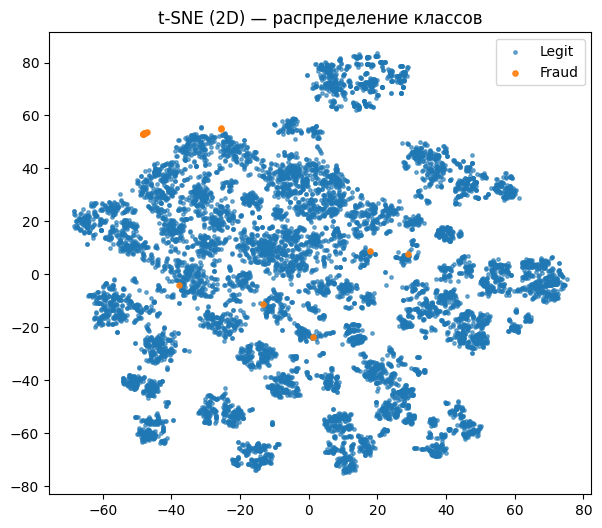

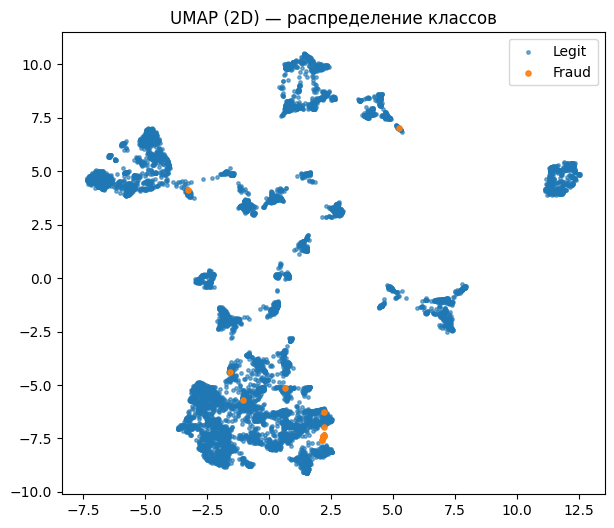

In [13]:

sample_size = min(10000, len(df))
embed_df = df.sample(n=sample_size, random_state=RANDOM_STATE).reset_index(drop=True)
y_emb = embed_df['Class'].values
X_emb = embed_df.drop(columns=['Class'])

X_emb_prep = ct.fit_transform(X_emb)

# t-SNE
tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=50, random_state=RANDOM_STATE)
tsne_2d = tsne.fit_transform(X_emb_prep)

plt.figure(figsize=(7,6))
plt.scatter(tsne_2d[y_emb==0,0], tsne_2d[y_emb==0,1], s=6, alpha=0.6, label='Legit')
plt.scatter(tsne_2d[y_emb==1,0], tsne_2d[y_emb==1,1], s=14, alpha=0.9, label='Fraud')
plt.title("t-SNE (2D) — распределение классов"); plt.legend(); plt.show()

# UMAP
if UMAP_AVAILABLE:
    reducer = umap.UMAP(n_neighbors=50, min_dist=0.1, n_components=2, random_state=RANDOM_STATE, metric='euclidean')
    umap_2d = reducer.fit_transform(X_emb_prep)

    plt.figure(figsize=(7,6))
    plt.scatter(umap_2d[y_emb==0,0], umap_2d[y_emb==0,1], s=6, alpha=0.6, label='Legit')
    plt.scatter(umap_2d[y_emb==1,0], umap_2d[y_emb==1,1], s=14, alpha=0.9, label='Fraud')
    plt.title("UMAP (2D) — распределение классов"); plt.legend(); plt.show()
else:
    print("UMAP недоступен. Установите пакет: pip install umap-learn")



## Сравнение алгоритмов аномалий и пересечения/объединения

Сформируем единый DataFrame с флагами аномалий для всех методов (на **тестовой** выборке там, где это уместно).
Затем посчитаем:
- Сколько точек попало **во все** предсказания сразу (`ALL_AGREE`).
- Сколько точек попало **хотя бы в одно** (`ANY_FLAGGED`).
- Сколько точек попало **не во все** (разнобой: `ANY_FLAGGED & ~ALL_AGREE`).

Покажем таблицы со статистикой и качеством относительно истинного `Class`.


In [14]:

from collections import OrderedDict

# Пороговые и DBSCAN методы рассчитаны "на всех данных"; для корректного сравнения разбиваем по индексам теста
# Создадим Series флагов по исходному df.index
sigma3_flags_full = pd.Series(sigma3_flags, index=df.index, name='sigma3')
iqr_flags_full    = pd.Series(iqr_flags,    index=df.index, name='iqr')
dbscan_flags_full = pd.Series(dbscan_flags, index=df.index, name='dbscan')

# Предсказания unsupervised на TEST уже посчитаны: iso_flags_test, ocsvm_flags_test, lof_flags_test, ee_flags_test
# Соберём их в единый фрейм (по индексам теста)
flags_test = pd.DataFrame(OrderedDict({
    'sigma3': sigma3_flags_full.loc[X_test.index].values,
    'iqr': iqr_flags_full.loc[X_test.index].values,
    'dbscan': dbscan_flags_full.loc[X_test.index].values,
    'isoforest': iso_flags_test,
    'ocsvm': ocsvm_flags_test,
    'lof': lof_flags_test,
    'elliptic': ee_flags_test
}), index=X_test.index)

flags_test['Class'] = y_test.values

# Пересечения/объединения
algo_cols = ['sigma3','iqr','dbscan','isoforest','ocsvm','lof','elliptic']
flags_test['flags_sum'] = flags_test[algo_cols].sum(axis=1)
flags_test['ANY_FLAGGED'] = (flags_test['flags_sum'] > 0).astype(int)
flags_test['ALL_AGREE'] = (flags_test['flags_sum'] == len(algo_cols)).astype(int)
flags_test['NOT_ALL'] = ((flags_test['flags_sum'] > 0) & (flags_test['flags_sum'] < len(algo_cols))).astype(int)

# Сводная статистика
summary = pd.DataFrame({
    'count': flags_test.shape[0],
    'fraud_rate_test': [flags_test['Class'].mean()]
})

per_algo_stats = flags_test[algo_cols + ['Class']].agg(['mean']).T
per_algo_stats.rename(columns={'mean':'flag_rate'}, inplace=True)
per_algo_stats['precision_wrt_Class1'] = np.nan
per_algo_stats['recall_wrt_Class1'] = np.nan

# Precision/Recall для каждого бинарного флага относительно истинного класса
from sklearn.metrics import precision_score, recall_score
for c in algo_cols:
    try:
        per_algo_stats.loc[c, 'precision_wrt_Class1'] = precision_score(flags_test['Class'], flags_test[c])
        per_algo_stats.loc[c, 'recall_wrt_Class1']    = recall_score(flags_test['Class'], flags_test[c])
    except Exception:
        pass

print("=== Overall test summary ===")
display(summary)
print("\n=== Per-algorithm flag rates & precision/recall (relative to Class=1) ===")
display(per_algo_stats)

# Таблица по пересечениям
intersections = pd.crosstab(flags_test['flags_sum'], flags_test['Class'], rownames=['#algorithms flagged'], colnames=['Class'])
print("\n=== Distribution by number of algorithms that flagged a sample ===")
display(intersections)

# Выборки точек: ALL_AGREE и NOT_ALL
all_agree_idx = flags_test.index[flags_test['ALL_AGREE'] == 1]
not_all_idx   = flags_test.index[flags_test['NOT_ALL'] == 1]

print(f"ALL_AGREE count: {len(all_agree_idx)}")
print(f"NOT_ALL (disagreement) count: {len(not_all_idx)}")

# Мини-таблицы с несколькими примерами
print("\nПримеры ALL_AGREE (до 10 строк):")
display(flags_test.loc[all_agree_idx].head(10))

print("\nПримеры NOT_ALL (до 10 строк):")
display(flags_test.loc[not_all_idx].head(10))


=== Overall test summary ===


,count,fraud_rate_test
0,71202,0.001727



=== Per-algorithm flag rates & precision/recall (relative to Class=1) ===


,flag_rate,precision_wrt_Class1,recall_wrt_Class1
sigma3,0.132426,0.011666,0.894309
iqr,0.486194,0.003409,0.959350
dbscan,0.000997,0.183099,0.105691
isoforest,0.001756,0.232000,0.235772
ocsvm,0.010435,0.133244,0.804878
lof,0.001727,0.016260,0.016260
elliptic,0.001924,0.036496,0.040650
Class,0.001727,NaN,NaN



=== Distribution by number of algorithms that flagged a sample ===


Class,0,1
#algorithms flagged,,
0,36546,5
1,25149,8
2,8635,11
3,611,68
4,85,18
5,40,8
6,13,5


ALL_AGREE count: 0
NOT_ALL (disagreement) count: 34651

Примеры ALL_AGREE (до 10 строк):


,sigma3,iqr,dbscan,isoforest,ocsvm,lof,elliptic,Class,flags_sum,ANY_FLAGGED,ALL_AGREE,NOT_ALL



Примеры NOT_ALL (до 10 строк):


,sigma3,iqr,dbscan,isoforest,ocsvm,lof,elliptic,Class,flags_sum,ANY_FLAGGED,ALL_AGREE,NOT_ALL
39041,1,1,0,0,0,0,0,0,2,1,0,1
205217,0,1,0,0,0,0,0,0,1,1,0,1
93103,0,1,0,0,0,0,0,0,1,1,0,1
19341,0,1,0,0,0,0,0,0,1,1,0,1
10078,0,1,0,0,0,0,0,0,1,1,0,1
181397,0,1,0,0,0,0,0,0,1,1,0,1
282848,1,1,0,0,0,0,0,0,2,1,0,1
6280,0,1,0,0,0,0,0,0,1,1,0,1
151327,0,1,0,0,0,0,0,0,1,1,0,1
193253,0,1,0,0,0,0,0,0,1,1,0,1



## Визуализация сравнения методов

Построим простые столбчатые диаграммы для:
- долей флагов по каждому алгоритму,
- точности/полноты относительно `Class=1`,
- распределения по количеству алгоритмов, пометивших точку.


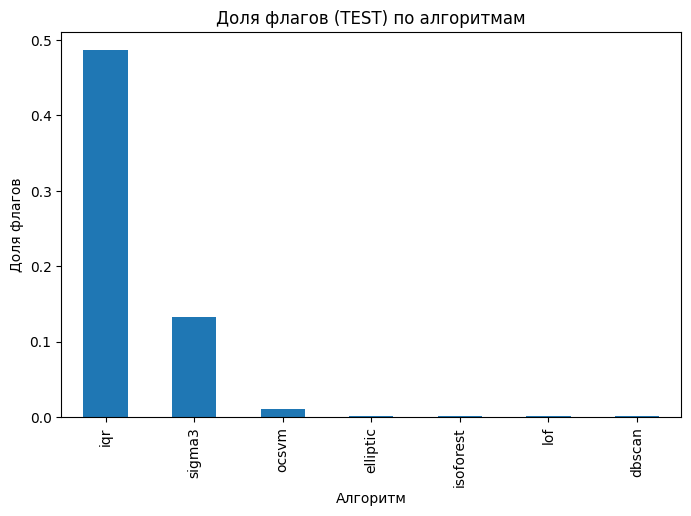

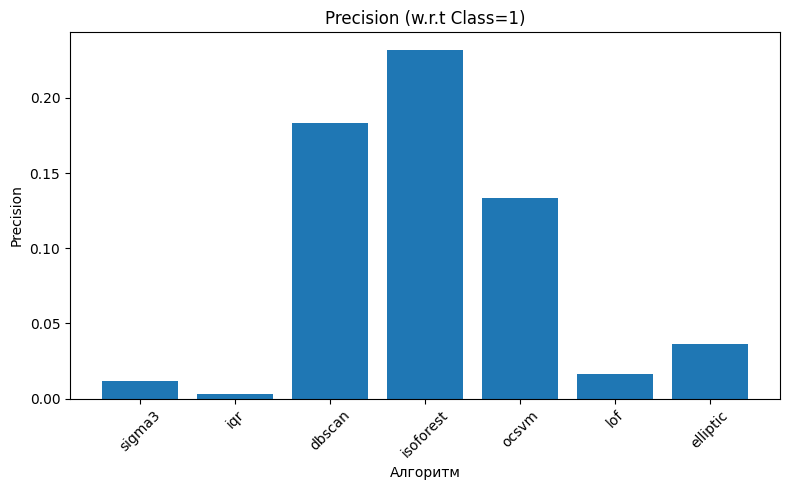

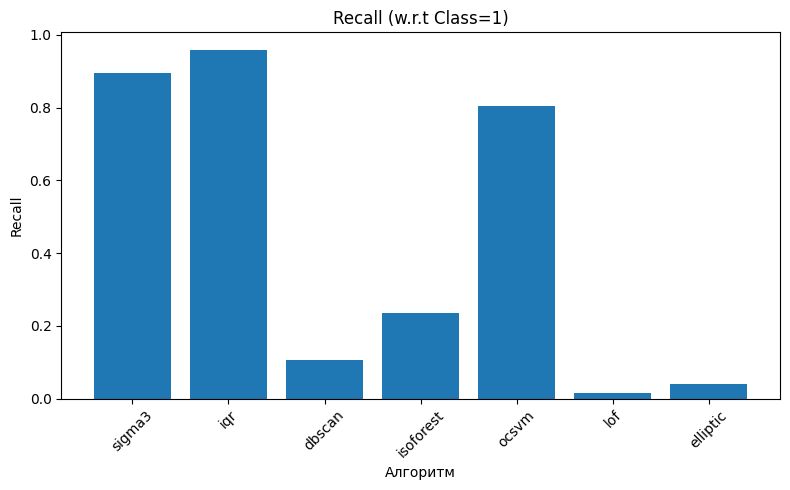

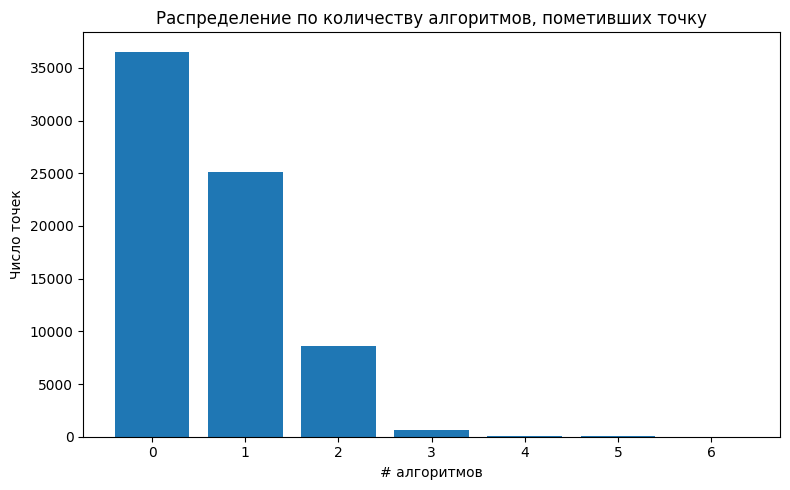

In [15]:

# Доля флагов
rates = flags_test[algo_cols].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
rates.plot(kind='bar')
plt.title("Доля флагов (TEST) по алгоритмам")
plt.xlabel("Алгоритм"); plt.ylabel("Доля флагов")
plt.show()

# Precision / Recall
precisions = []
recalls = []
for c in algo_cols:
    try:
        precisions.append(precision_score(flags_test['Class'], flags_test[c]))
        recalls.append(recall_score(flags_test['Class'], flags_test[c]))
    except Exception:
        precisions.append(np.nan); recalls.append(np.nan)

# отдельные графики, без цветов/стилей
plt.figure(figsize=(8,5))
plt.bar(algo_cols, precisions)
plt.title("Precision (w.r.t Class=1)"); plt.xlabel("Алгоритм"); plt.ylabel("Precision")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

plt.figure(figsize=(8,5))
plt.bar(algo_cols, recalls)
plt.title("Recall (w.r.t Class=1)"); plt.xlabel("Алгоритм"); plt.ylabel("Recall")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

# Распределение по числу алгоритмов, пометивших точку
counts = flags_test['flags_sum'].value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Распределение по количеству алгоритмов, пометивших точку")
plt.xlabel("# алгоритмов"); plt.ylabel("Число точек")
plt.tight_layout(); plt.show()



## Выводы




## Выводы по результатам экспериментов

### 1) Пороговые правила (оцениваются на всём датасете, 284 807 строк)
- **3-sigma**  
  — Флагов: **37 816** (**13.28%**).  
  — Метрики: **precision=0.0117**, **recall=0.9024**, **f1=0.0232**.  
  — *Интерпретация:* очень высокий охват, но огромный поток ложных срабатываний → пригодно лишь как грубый «кандидатный» фильтр.

- **IQR**  
  — Флагов: **138 473** (**48.62%**).  
  — Метрики: **precision=0.0034**, **recall=0.9695**, **f1=0.0069**.  
  — *Интерпретация:* ещё более «широкая сеть», в практическом смысле непригодно из-за колоссального FP.

**Итог по порогам:** как самостоятельные детекторы бесполезны; можно использовать как предварительный отбор для дальнейшей проверki.

---

### 2) DBSCAN (сетка по `eps` на сэмпле → перенос меток; отчёт на тесте, 71 202 строк)
- Лучший `eps` на сэмпле ≈ **10.5088**, шум на сэмпле **0.16%** при цели **0.1727%**.  
- На тесте: **precision=0.1401**, **recall=0.0894**, **f1=0.1092**.  
- *Интерпретация:* строгий (точнее пороговых), но охватывает мало фрода → годится как «узкий» фильтр, не как основной детектор.

---

### 3) Unsupervised / One-Class (оценка на тесте)
- **Isolation Forest**: **precision=0.2320**, **recall=0.2358**, **f1=0.2339** — самый сбалансированный по точности среди несупервизорных.  
- **One-Class SVM**: **precision=0.1332**, **recall=0.8049**, **f1=0.2286** — отличный охват при умеренной точности.  
- **LOF (novelty)**: **precision=0.0163**, **recall=0.0163** — очень слабый.  
- **EllipticEnvelope**: **precision=0.0365**, **recall=0.0407** — тоже слабый.

**Итог:** если нужен высокий **recall** без ярлыков класса — **OC-SVM**; если важнее **precision** при умеренном recall — **Isolation Forest**.

---

### 4) Supervised бенчмарк (Logistic Regression, на тесте)
- **precision=0.0625**, **recall=0.8862**, **f1=0.1167**, **ROC-AUC=0.9727**, **PR-AUC=0.7062** при стандартном пороге 0.5.  
- *Интерпретация:* высокая разделимость (ROC/PR-AUC), но порог 0.5 даёт низкий precision. При тюнинге порога по PR-кривой можно существенно увеличить precision при заданном минимальном recall (лучший единичный путь среди всех методов).

---

### 5) Согласие алгоритмов (пересечения флагов на тесте)
- **ALL_AGREE = 0**: ни одна точка не помечена всеми 7 методами одновременно → детекторы ловят разные «режимы» аномалий.  
- Если требовать **≥3 алгоритма**:  
  — Флагов: **848** (из них **99** — фрод) → **precision≈11.7%**, **recall≈80.5%**.  
- Если требовать **≥4 алгоритма**:  
  — Флагов: **169** (из них **31** — фрод) → **precision≈18.3%**, **recall≈25.2%**.

**Итог:** мажоритарное голосование повышает точность относительно «широких сетей», но всё ещё уступает по качеству лучшим одиночным моделям с тюнингом порога.



